![Banner](/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/team_challenge_enterprise/Sprint_10/banner.jpg)

## TEAM CHALLENGE: TOOLBOX (I)

Este notebook describe la primera parte del team challenge dedicado a construir un módulo de herramientas básicas para poder preparar la creación de modelos de Machine Learning de una forma más sencilla. 

En esta primera parte, el grupo debe crear un conjunto de funciones que se describen a continuación y crear con ellas un módulo en script "toolbox_ML.py".

Este módulo se empleará en la segunda parte del challenge para resolver un problema de Machine Learning.

### Entregables
Por lo tanto, **se pide:**  
**1. Entregar un script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado [fuciones]. La entrega se hará en el repositorio del grupo.**  
**2. Hacer una descripción del código creado en una breve presentación de 10-15 minutos, empleando para ello un ejemplo diseñado por el grupo**  
**3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo**  

### Plazos
Tendremos 2 sesiones de team challenge para crear el código y una sesión de presentación.  
Debéis entregar en enlace al repositorio via mail a ta_ds2_online@thebridgeonline.es el día anterior a la presentación (hora límite 17:00h)
- Turno de mañana: Entrega 28 de enero / Presentación 29 de enero
- Turno de tarde: Entrega 30 de enero / Presentación 31 de enero



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



### Funcion: describe_df

Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (no el de la imagen). Es decir un dataframe que tenga una columna por cada columan del dataframe original y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad. 

La figura muestra el resultado esperado de llamar a la función pedida con el dataset del titanic:
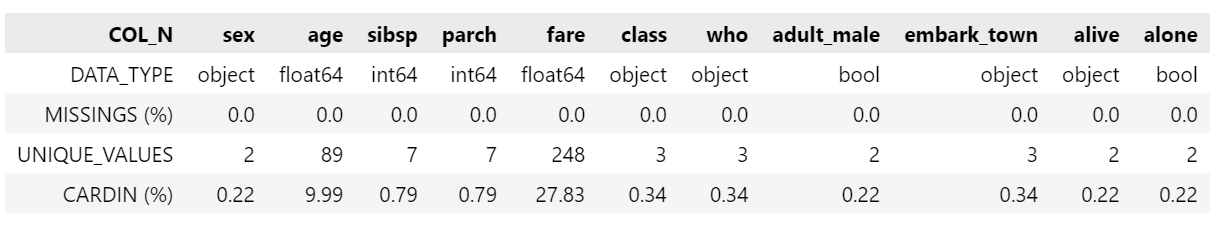
    

In [ ]:
import pandas as pd

def describe_df(df):
    
    """
    Toma un DataFrame y devuelve un resumen transpuesto de cada columna con información:
    - Tipo de dato.
    - Porcentaje de valores nulos.
    - Número de valores únicos.
    - Porcentaje de cardinalidad. 

    Argumentos:
    DataFrame que contiene los datos a describir.

    Return:
    DataFrame transpuesto con 'Column' como índice y números redondeados a 2 decimales.
    """


    
    description = pd.DataFrame({
        'Column': df.columns,
        'Data_Type': [df[col].dtype for col in df.columns],
        'Null (%)': [df[col].isnull().mean() * 100 for col in df.columns],
        'Unique_Values': [df[col].nunique() for col in df.columns],
        'Cardin (%)': [(df[col].nunique() / len(df)) * 100 for col in df.columns]
    })
    
    # Establecer 'Column' como índice
    description.set_index('Column', inplace=True)
    
    # Redondear valores numéricos a 2 decimales
    description = description.round(2)
    
    # Transponer el DataFrame
    return description.T  

### Funcion: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


In [4]:
def tipifica_variables(df, umbral_categoria, umbral_continua):
  """
  Tipifica las variables de un DataFrame.

  Argumentos:
    df: DataFrame a analizar.
    umbral_categoria: Umbral máximo de cardinalidad para considerar una variable categórica.
    umbral_continua: Umbral mínimo de porcentaje de cardinalidad respecto al total de filas para considerar una variable numérica discreta.

  Returns:
    DataFrame con las columnas 'nombre_variable' y 'tipo_sugerido'.
  """

  tipos = []
  for col in df.columns:
    cardinalidad = df[col].nunique()
    total_filas = df.shape[0]
    porcentaje_cardinalidad = cardinalidad / total_filas

    if cardinalidad == 2:
      tipo = "Binaria"
    elif cardinalidad < umbral_categoria:
      tipo = "Categórica"
    else:
      if porcentaje_cardinalidad >= umbral_continua:
        tipo = "Numérica Continua"
      else:
        tipo = "Numérica Discreta"

    tipos.append(tipo)

  # Crear DataFrame con 'nombre_variable' como índice y un título
  resultado = pd.DataFrame({'tipo_sugerido': tipos})
  resultado.index = df.columns
  resultado.index.name = 'nombre_variable'  # Asigna un nombre al índice

  return resultado


### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

def get_features_num_regression(df, target_col, umbral_corr, pvalue=None):
    """
    Selecciona columnas numéricas con alta correlación con el target para regresión.

    :param df: pd.DataFrame - DataFrame de entrada.
    :param target_col: str - Columna objetivo.
    :param umbral_corr: float - Umbral mínimo de correlación en valor absoluto.
    :param pvalue: float - Valor p para la significancia estadística (opcional).
    :return: list - Lista de nombres de columnas que cumplen los criterios.
    """
    # Validaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("❌ El argumento 'df' debe ser un DataFrame.")
        return None

    if target_col not in df.columns:
        print(f"❌ La columna objetivo '{target_col}' no está en el DataFrame.")
        return None

    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"❌ La columna objetivo '{target_col}' debe ser numérica y continua.")
        return None

    if not (0 <= umbral_corr <= 1):
        print("❌ El argumento 'umbral_corr' debe estar entre 0 y 1.")
        return None

    if pvalue is not None and not (0 <= pvalue <= 1):
        print("❌ El argumento 'pvalue' debe estar entre 0 y 1 o ser None.")
        return None

    # Selección de columnas numéricas
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    if target_col in num_cols:
        num_cols.remove(target_col)

    if not num_cols:
        print("⚠️ No se encontraron columnas numéricas en el DataFrame aparte de la columna objetivo.")
        return []

    seleccionadas = []

    for col in num_cols:
        try:
            correlacion = df[[col, target_col]].dropna()
            corr, p = pearsonr(correlacion[col], correlacion[target_col])
            if abs(corr) >= umbral_corr:
                if pvalue is None or p <= (1 - pvalue):
                    seleccionadas.append(col)
        except Exception as e:
            print(f"⚠️ Error al calcular la correlación para la columna '{col}': {e}")

    if not seleccionadas:
        print("⚠️ No se encontraron columnas que cumplan con los criterios especificados.")
        return []

    print(f"✅ Columnas seleccionadas: {seleccionadas}")
    return seleccionadas

In [4]:
import seaborn as sns

# Carga de un dataset de ejemplo
df = sns.load_dataset('iris')
df['target'] = df['sepal_length'] * 1.5  # Agregar una columna objetivo simulada

# Llamada a la función
resultado = get_features_num_regression(df, target_col='target', umbral_corr=0.5, pvalue=0.05)
print("Resultado:", resultado)

✅ Columnas seleccionadas: ['sepal_length', 'petal_length', 'petal_width']
Resultado: ['sepal_length', 'petal_length', 'petal_width']


### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Genera pairplots para las columnas numéricas seleccionadas en base a su correlación con una columna objetivo.

    :param df: pd.DataFrame - DataFrame de entrada
    :param target_col: str - Columna objetivo
    :param columns: list - Lista de columnas a considerar
    :param umbral_corr: float - Umbral mínimo de correlación en valor absoluto
    :param pvalue: float - Valor p para la significancia estadística (opcional)
    :return: list - Lista de columnas seleccionadas
    """
    # Validaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("❌ El argumento 'df' debe ser un DataFrame.")
        return None

    if target_col not in df.columns:
        print(f"❌ La columna objetivo '{target_col}' no está en el DataFrame.")
        return None

    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"❌ La columna objetivo '{target_col}' debe ser numérica y continua.")
        return None

    if not (0 <= umbral_corr <= 1):
        print("❌ El argumento 'umbral_corr' debe estar entre 0 y 1.")
        return None

    if pvalue is not None and not (0 <= pvalue <= 1):
        print("❌ El argumento 'pvalue' debe estar entre 0 y 1 o ser None.")
        return None

    # Si la lista de columnas está vacía, seleccionamos todas las numéricas menos la columna objetivo
    if not columns:
        columns = df.select_dtypes(include=['number']).columns.tolist()
        if target_col in columns:
            columns.remove(target_col)

    # Validar columnas
    if not all(col in df.columns for col in columns):
        print("❌ Algunas columnas especificadas no están en el DataFrame.")
        return None

    if not all(pd.api.types.is_numeric_dtype(df[col]) for col in columns):
        print("❌ Todas las columnas seleccionadas deben ser numéricas.")
        return None

    seleccionadas = []

    for col in columns:
        try:
            correlacion = df[[col, target_col]].dropna()
            corr, p = pearsonr(correlacion[col], correlacion[target_col])
            if abs(corr) >= umbral_corr:
                if pvalue is None or p <= (1 - pvalue):
                    seleccionadas.append(col)
        except Exception as e:
            print(f"⚠️ Error al calcular la correlación para la columna '{col}': {e}")

    if not seleccionadas:
        print("⚠️ No se encontraron columnas que cumplan con los criterios especificados.")
        return []

    # Generar pairplots
    max_cols_per_plot = 5
    print(f"✅ Columnas seleccionadas para pairplot: {seleccionadas}")
    for i in range(0, len(seleccionadas), max_cols_per_plot - 1):
        subset = seleccionadas[i:i + max_cols_per_plot - 1] + [target_col]
        try:
            sns.pairplot(df[subset].dropna())
            plt.show()
        except Exception as e:
            print(f"⚠️ Error al generar el pairplot para el subconjunto {subset}: {e}")

    return seleccionadas


✅ Columnas seleccionadas para pairplot: ['petal_length', 'petal_width']


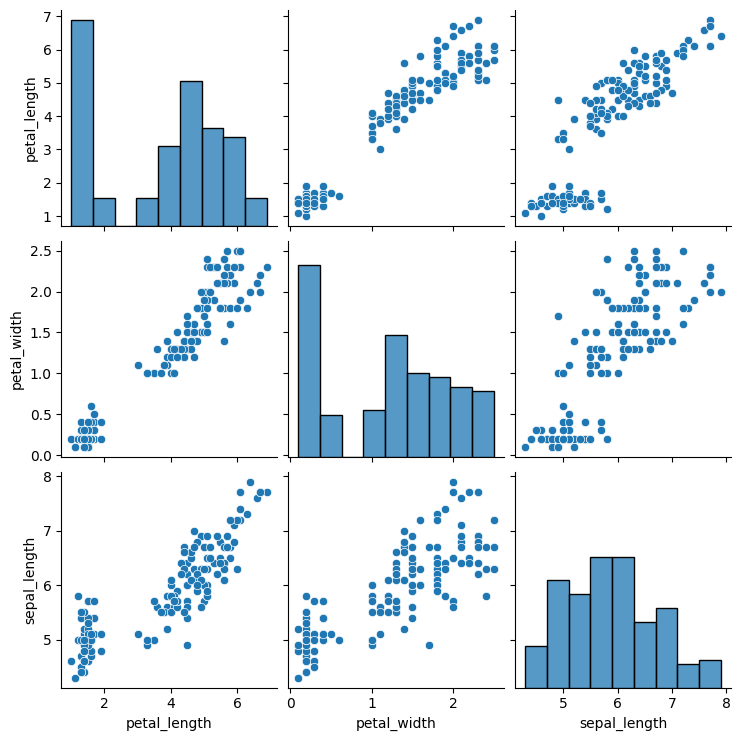

['petal_length', 'petal_width']

In [2]:
import seaborn as sns
df = sns.load_dataset('iris')  # Carga de un dataset de ejemplo
plot_features_num_regression(df, target_col='sepal_length', umbral_corr=0.5)

### Funcion: get_features_cat_regression



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

def get_features_cat_regression(df, target_col, pvalue=0.05):
    """
    Selecciona columnas categóricas relacionadas con la columna objetivo para regresión.

    :param df: pd.DataFrame - DataFrame de entrada.
    :param target_col: str - Columna objetivo.
    :param pvalue: float - Valor p para la significancia estadística (opcional).
    :return: list - Lista de nombres de columnas que cumplen los criterios.
    """
    # Validaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("❌ El argumento 'df' debe ser un DataFrame.")
        return None

    if target_col not in df.columns:
        print(f"❌ La columna objetivo '{target_col}' no está en el DataFrame.")
        return None

    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"❌ La columna objetivo '{target_col}' debe ser numérica y continua.")
        return None

    if pvalue is not None and not (0 <= pvalue <= 1):
        print("❌ El argumento 'pvalue' debe estar entre 0 y 1 o ser None.")
        return None

    # Selección de columnas categóricas
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    if not cat_cols:
        print("⚠️ No se encontraron columnas categóricas en el DataFrame.")
        return []

    seleccionadas = []

    for col in cat_cols:
        try:
            tabla_contingencia = pd.crosstab(df[col], df[target_col])
            _, p, _, _ = chi2_contingency(tabla_contingencia)
            if p <= pvalue:
                seleccionadas.append(col)
        except Exception as e:
            print(f"⚠️ Error al analizar la relación para la columna '{col}': {e}")

    if not seleccionadas:
        print("⚠️ No se encontraron columnas que cumplan con los criterios especificados.")
        return []

    print(f"✅ Columnas seleccionadas: {seleccionadas}")
    return seleccionadas


In [4]:
#Prueba con dataset del Titanic

df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/team_challenge_enterprise/Sprint_10/data/titanic.csv")

selected_categorical_features = get_features_cat_regression(df, target_col='age', pvalue=0.05)




✅ Columnas seleccionadas: ['embarked', 'class', 'who', 'embark_town']


### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency

def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    """
    Genera histogramas agrupados de características categóricas en base a su relación con la columna objetivo.

    :param df: pd.DataFrame - DataFrame de entrada.
    :param target_col: str - Columna objetivo.
    :param columns: list - Lista de columnas categóricas a considerar.
    :param pvalue: float - Valor p para la significancia estadística (opcional).
    :param with_individual_plot: bool - Si se deben mostrar histogramas individuales.
    :return: list - Lista de columnas seleccionadas.
    """
    # Validaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("❌ El argumento 'df' debe ser un DataFrame.")
        return None

    if target_col not in df.columns:
        print(f"❌ La columna objetivo '{target_col}' no está en el DataFrame.")
        return None

    seleccionadas = get_features_cat_regression(df, target_col, pvalue)

    if with_individual_plot:
        for col in seleccionadas:
            sns.histplot(data=df, x=target_col, hue=col, kde=True)
            plt.show()

    return seleccionadas

✅ Columnas seleccionadas: ['embarked', 'class', 'who', 'embark_town']


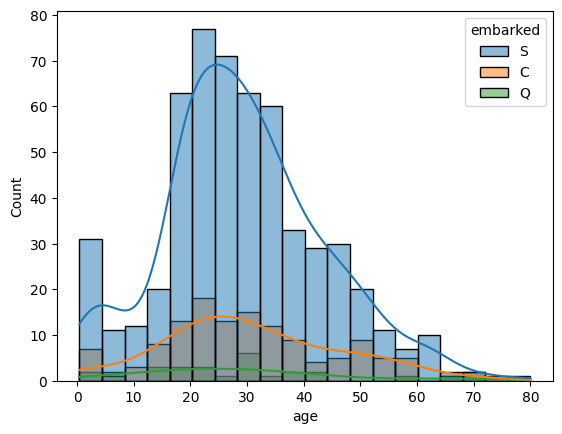

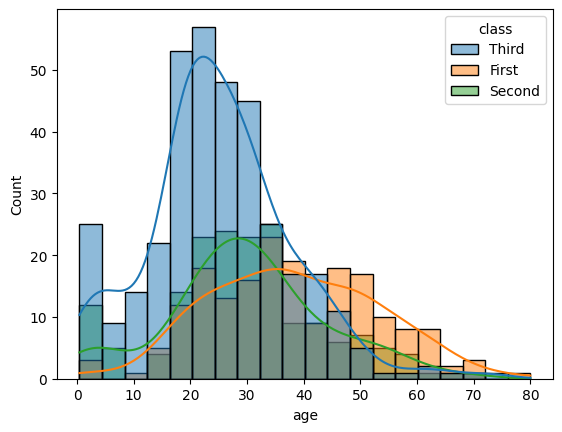

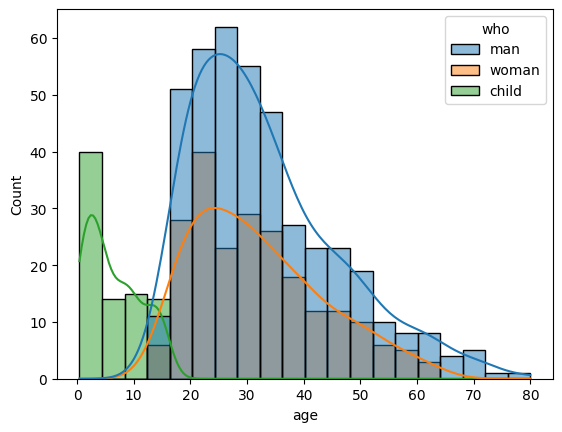

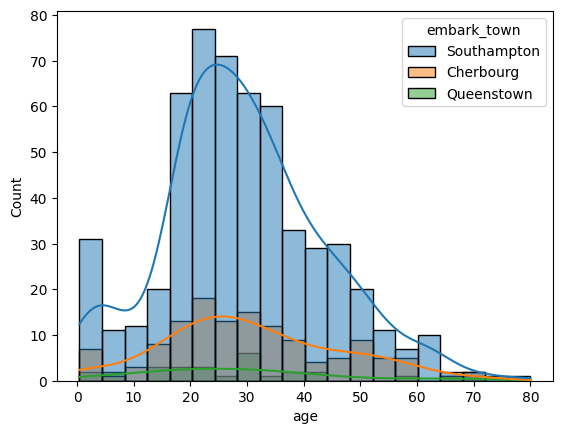

['embarked', 'class', 'who', 'embark_town']

In [16]:
#Prueba con dataset Titanic

plot_features_cat_regression(df, target_col='age',columns=[], pvalue=0.05, with_individual_plot=True)



### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

